# Yolov5 Training 

Train yolov5m on Gathered fabrics data we have two classes for **0:stain,1: vertical or horizontal lines**.

In [3]:
import torch

check the gpu for training we will use pre-trained model to achieve maximum performance possible. 

In [4]:
torch.cuda.is_available()
torch.cuda.empty_cache()

# model training & Fine tunning
after many experiments due to we work with small data-set it batter to freeze the feature some of extractors and,discard the head with 80 class output to replace it with output for two classes.
train for 100 epoch with small learning rate .001 for Adam opt the rest of the hyper-parameters are in `hypfine.yaml` file.

In [5]:
%run yolov5/train.py \
        --data data.yaml  --cfg yolov5m.yaml \
        --weights yolov5m.pt --batch-size 22 \
        --epochs 100  --workers 2 --img 512 \
        --optimizer Adam  --save-period 50 \
        --freeze 6 --hyp hypfine.yaml 


train: weights=yolov5m.pt, cfg=yolov5m.yaml, data=data.yaml, hyp=hypfine.yaml, epochs=100, batch_size=22, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=2, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[6], save_period=50, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
requirements: YOLOv5 requirements "opencv-python>=4.1.1" "thop>=0.1.1" not found, attempting AutoUpdate...
requirements:  Command 'pip install "opencv-python>=4.1.1" "thop>=0.1.1"  ' returned non-zero exit status 1.
YOLOv5  v7.0-69-g3b6e27a Python-3.9.13 torch-1.13.1 CUDA:0 (NVIDIA GeFor


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       0/99      2.97G    0.07139    0.01846    0.01336         26        512: 100%|██████████| 116/116 [00:33<00:00,  
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 24/24 [00:12
                   all       1036       1437      0.368      0.294      0.242     0.0762

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       1/99      4.59G    0.05296    0.01424   0.003491         21        512: 100%|██████████| 116/116 [00:34<00:00,  
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 24/24 [00:12
                   all       1036       1437       0.52      0.515      0.442      0.128

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       2/99      4.59G    0.04671    0.01122   0.002204         29        512: 100%|██████████| 116/116 [

      20/99      4.59G    0.03157   0.007521   0.001062         25        512: 100%|██████████| 116/116 [00:33<00:00,  
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 24/24 [00:13
                   all       1036       1437      0.878      0.814       0.87      0.494

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      21/99      4.59G    0.03106   0.007579   0.001131         23        512: 100%|██████████| 116/116 [00:33<00:00,  
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 24/24 [00:13
                   all       1036       1437      0.873      0.821      0.883       0.51

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      22/99      4.59G    0.03133   0.007625   0.001191         24        512: 100%|██████████| 116/116 [00:32<00:00,  
                 Class     Images  Instances          P         

      60/99      4.59G    0.02392   0.005995  0.0008903         28        512: 100%|██████████| 116/116 [00:33<00:00,  
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 24/24 [00:13
                   all       1036       1437      0.926      0.898      0.951      0.618

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      61/99      4.59G    0.02377    0.00597  0.0009022         31        512: 100%|██████████| 116/116 [00:33<00:00,  
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 24/24 [00:13
                   all       1036       1437      0.926      0.896      0.952      0.645

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      62/99      4.59G    0.02361   0.005801  0.0009621         24        512: 100%|██████████| 116/116 [00:33<00:00,  
                 Class     Images  Instances          P         


Validating yolov5\runs\train\exp\weights\best.pt...
Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 24/24 [00:11
                   all       1036       1437      0.949      0.951      0.979       0.73
                 stain       1036        828      0.951      0.919      0.967      0.706
                  line       1036        609      0.947      0.984      0.991      0.755
Results saved to yolov5\runs\train\exp


the final results show good MAP score lets check some predictions.

## model predictions


<img src="trained model/train_batch0.jpg" alt="im1" style="width:500px;height:600px;">
<img src="trained model/train_batch1.jpg" alt="im1" style="width:600px;height:600px;">
<img src="trained model/train_batch2.jpg" alt="im1" style="width:600px;height:600px;">
<img src="trained model/val_batch0_pred.jpg" alt="im1" style="width:600px;height:600px;">
<img src="trained model/val_batch1_pred.jpg" alt="im1" style="width:600px;height:600px;">
<img src="trained model/val_batch2_pred.jpg" alt="im1" style="width:600px;height:600px;">

In [6]:
torch.cuda.is_available()
torch.cuda.empty_cache()

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.hub.load('yolov5', 'custom', path='trained model/weights/best.pt', source='local').eval().to(device)

image1 = 'trained model/tests/test1.jpg'
image2 = 'trained model/tests/test2.jpg'


YOLOv5  v7.0-69-g3b6e27a Python-3.9.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients
Adding AutoShape... 


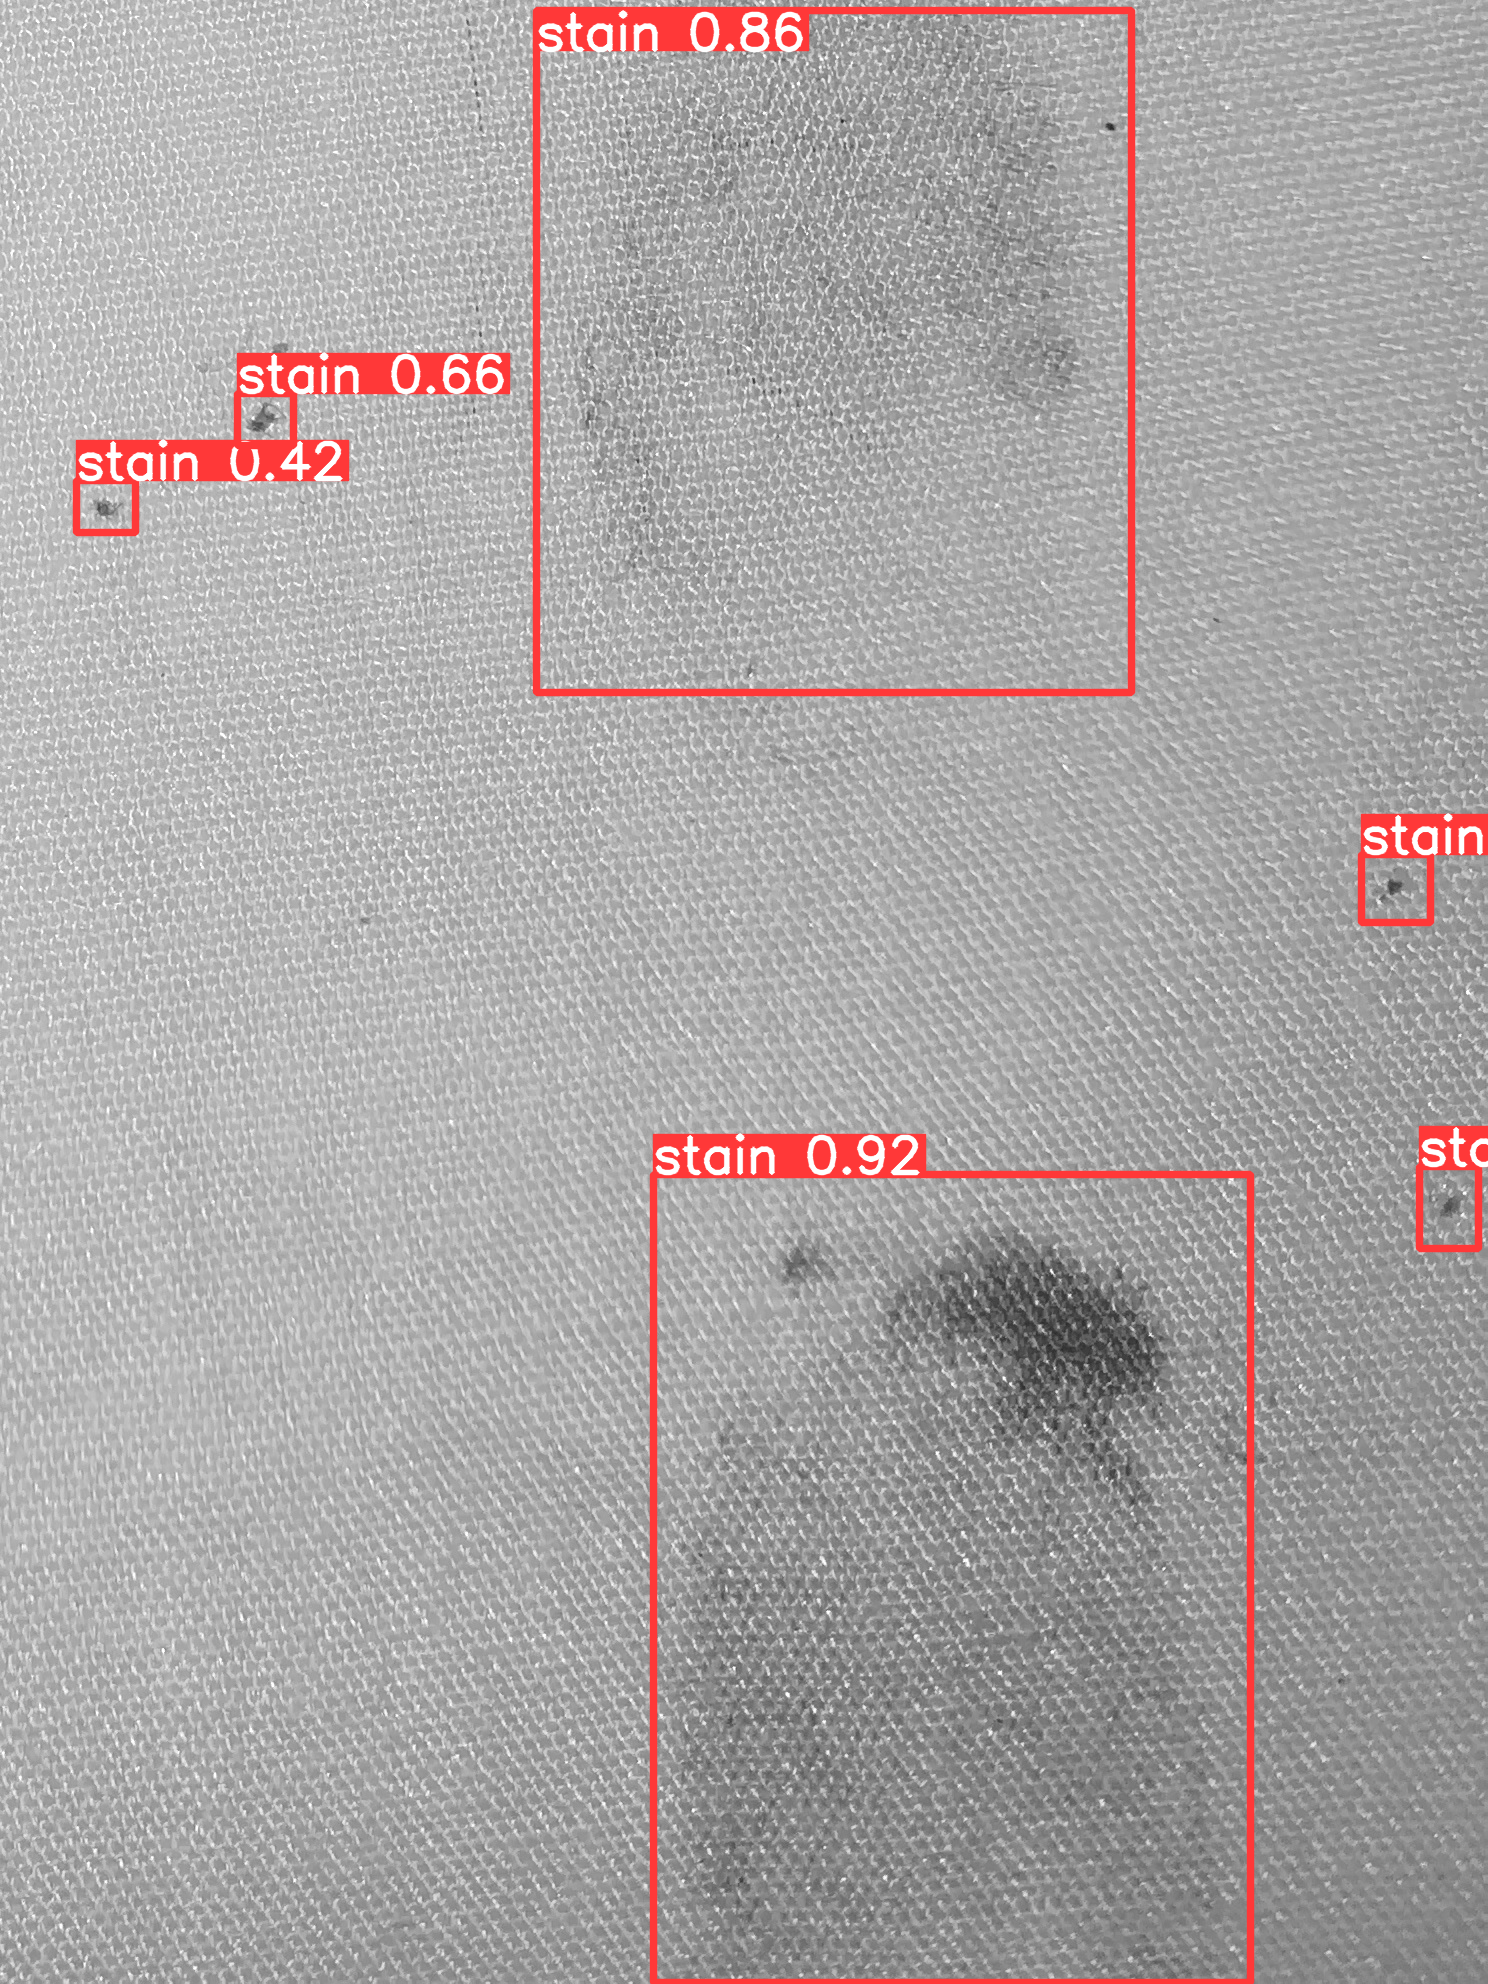

In [12]:
results = model(image1)
results.show()

In [13]:
results = model(image2)
results.show()

In [1]:
import torch
import numpy as np
import cv2
from time import time

class videoDetection:
    """
    Class implements Yolo5 model to make customized video predictions.
    """
    
    def __init__(self  ):
        """
        Initializes the class model , device ,and Classes names.
    
        """
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.model = self.load_model()
        self.classes = self.model.names

    def load_model(self):
        """
        Loads Yolo5 model from pytorch hub.
        Returns: 
            model (torch ) : Trained Pytorch model.
        """
        model =  torch.hub.load('yolov5', 'custom', path='trained model/weights/best.pt', source='local').eval().to(self.device)
        return model


    def score_frame(self, frame):
        """
        Takes a single frame as input, and scores the frame using yolo5 model.
        Parameters:
            frame (array): input frame in numpy/list/tuple format.
        Returns:
            Labels (list) : objects bounding boxes classes
            Coordinates (list) : bounding boxes coordenaties.
        """
        self.model.to(self.device)
        results = self.model(frame)
        labels, cord = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]
        return labels, cord

    def class_to_label(self, x):
        """
        For a given label value, return corresponding string label.
            Parameters:
                x (int): numeric label
            Returns:
                corresponding string label
        """
        return self.classes[int(x)]


    def plot_boxes(self, results, frame):
        """
        Takes a frame and its results as input, and plots the bounding boxes and label on to the frame.
            Parameters:
                results (list): contains labels and coordinates predicted by model on the given frame.
                frame (array): Frame which has been scored.
            Returns:
                Frame with bounding boxes and labels ploted on it.
        """
        labels, cord = results
        n = len(labels)
        x_shape, y_shape = frame.shape[1], frame.shape[0]
        for i in range(n):
            row = cord[i]
            if row[4] >= 0.2:
                x1, y1, x2, y2 = int(row[0]*x_shape), int(row[1]*y_shape), int(row[2]*x_shape), int(row[3]*y_shape)
                bgr = (0, 255, 0)
                cv2.rectangle(frame, (x1, y1), (x2, y2), bgr, 2)
                cv2.putText(frame, self.class_to_label(labels[i]), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, bgr, 2)

        return frame


    def detect(self, input_path, out_file):
        """
        This function is called when class is executed, it runs the loop to read the video frame by frame,
        and write the output into a new file.
        """
        player = cv2.VideoCapture(input_path )
        fr = player.get(cv2.CAP_PROP_FPS)
        assert player.isOpened()
        
        x_shape = int(player.get(cv2.CAP_PROP_FRAME_WIDTH))
        y_shape = int(player.get(cv2.CAP_PROP_FRAME_HEIGHT))
        four_cc = cv2.VideoWriter_fourcc(*"MJPG")
        out = cv2.VideoWriter(out_file, four_cc, fr, (512, 512))
        while True:
            start_time = time()
            ret, frame = player.read()
            if not ret:
                break
            
            frame = cv2.resize(frame, (512,512), interpolation = cv2.INTER_AREA)
            frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            results = self.score_frame(frame1)
            frame = self.plot_boxes(results, frame)
            #frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
            end_time = time()
            fps = 1/np.round(end_time - start_time, 3)
            #print(f"Frames Per Second : {fps}")
            out.write(frame)

In [2]:
input_path = 'trained model/tests/video2.mp4'
out_file = 'trained model/tests/pred.avi'
vd =videoDetection()
vd.detect( input_path, out_file)

YOLOv5  v7.0-69-g3b6e27a Python-3.9.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients
Adding AutoShape... 


In [3]:
input_path = 'trained model/tests/video4-fabric2_edited.mp4'
out_file = 'trained model/tests/video4-fabric2_edited_predections.avi'
vd =videoDetection()
vd.detect( input_path, out_file)

YOLOv5  v7.0-69-g3b6e27a Python-3.9.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients
Adding AutoShape... 
